In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1979)

# Exercise H8.2 Variability of Classification

In [2]:
def generate_sample(p):
    myu_1 = np.array([0,1])
    myu_2 = np.array([1,0])
    cov = np.eye(2) *2
    
    p1 = int(p*0.5)
    p2 = p-p1
    d1 = np.random.multivariate_normal(mean = myu_1 , cov=cov, size=p1).T
    d2 = np.random.multivariate_normal(mean = myu_2 , cov=cov, size=p2).T
    bias = np.ones((1,p))
    
    d = np.concatenate((d1,d2), axis=1)
    d = np.concatenate((bias, d), axis=0)
    
    y1 = np.full(p1, 1)
    y2 = np.full(p2, -1)
    
    y = np.concatenate((y1,y2), axis=0).reshape((1,-1))
    
    return d, y

In [3]:
def compute_w(train, y_train):
    w = np.linalg.inv(train @ train.T) @ train @ y_train.T
    return w

In [4]:
def predict(data, w):
    return np.sign(w.T@data)

In [5]:
ps = [3, 4, 6, 8, 10, 20, 40, 100]
#ps=[3]
accuracy_train = {}
accuracy_test = {}
ws = {}
for p in ps:
    p_str = '{}'.format(p)
    accuracy_train[p_str] = []
    accuracy_test[p_str] = []
    ws[p_str] = []
    for i in range(50):   
        data, label = generate_sample(p)  
        data_test, label_test = generate_sample(1000)
        
        w = compute_w(data, label)
        ws[p_str].append(w)
        
        pred = predict(data,w)
        diff = pred == label
        percentage = np.sum(diff.astype(int))/p

        accuracy_train[p_str].append(percentage)
        
        pred = predict(data_test,w)
        diff = pred == label_test
        percentage = np.sum(diff.astype(int))/1000
        accuracy_test[p_str].append(percentage)          

## a

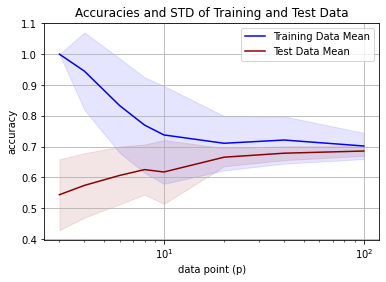

In [6]:
means = []
stds = []

means_test = []
stds_test = []
for p in ps:
    means.append(np.mean(accuracy_train[str(p)]))
    means_test.append(np.mean(accuracy_test[str(p)]))
    
    
    stds.append(np.std(accuracy_train[str(p)]))
    stds_test.append(np.std(accuracy_test[str(p)]))

means = np.array(means)
stds = np.array(stds)

means_test = np.array(means_test)
stds_test = np.array(stds_test)

plt.title('Accuracies and STD of Training and Test Data')
plt.plot(ps, means, label='Training Data Mean', color='blue')
#plt.plot(ps, stds, label='Training Data STD', color='royalblue')
plt.fill_between(ps, means-stds, means+stds, color='blue', alpha=.1)

plt.plot(ps, means_test, label='Test Data Mean', color='darkred')
plt.fill_between(ps, means_test-stds_test, means_test+stds_test, color='darkred', alpha=.1)

plt.xlabel('data point (p)')
plt.ylabel('accuracy')

plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

## b

In [7]:
means = []
stds = []

means_test = []
stds_test = []
for p in ps:
    means.append(np.mean(ws[str(p)], axis=0))
    stds.append(np.std(ws[str(p)], axis=0))
means = np.array(means).reshape(8,3).T
stds = np.array(stds).reshape(8,3).T

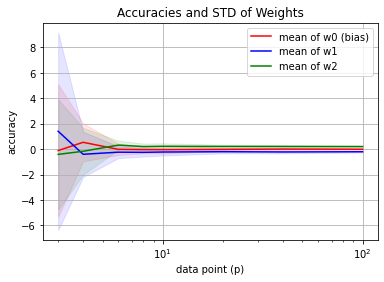

In [8]:
plt.title('Accuracies and STD of Weights')
plt.plot(ps, means[0], label='mean of w0 (bias)', c='r')
plt.fill_between(ps, means[0]-stds[0], means[0]+stds[0], color='r', alpha=.1)
plt.plot(ps, means[1], label='mean of w1', color='blue')
plt.fill_between(ps, means[1]-stds[1], means[1]+stds[1], color='blue', alpha=.1)
plt.plot(ps, means[2], label='mean of w2', color='green')
plt.fill_between(ps, means[2]-stds[2], means[2]+stds[2], color='green', alpha=.1)


plt.xlabel('data point (p)')
plt.ylabel('accuracy')

plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

in general, the higher yield to convergence for both weights and accuracy measurement. The larger number p means that we have better representation of the data. Therefore, the differences between train risk and the generalization risk would eventually get smaller. 

# Exercise H8.3: The Binomial distribution

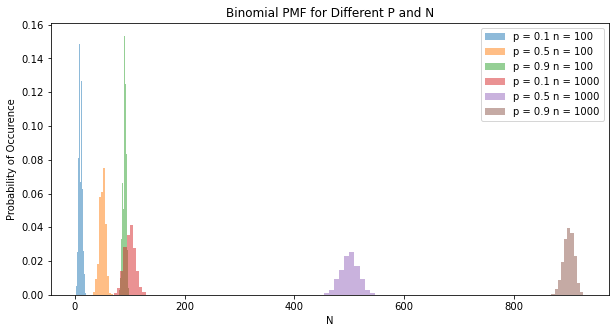

In [9]:
ns = [100, 1000]
ps = [0.1, 0.5, 0.9]
trial = 1000

results = []

plt.figure(figsize=(10,5))
for n in ns:
    for p in ps:
        s = np.random.binomial(n, p, trial)
        results.append(s)
        
        lbl_text = 'p = {} n = {}'.format(p,n)
        plt.hist(s, label=lbl_text, alpha = 0.5, stacked=True, density=True)
        
plt.title('Binomial PMF for Different P and N')
plt.xlabel('N')
plt.ylabel('Probability of Occurence')
plt.legend()
plt.show()

## b

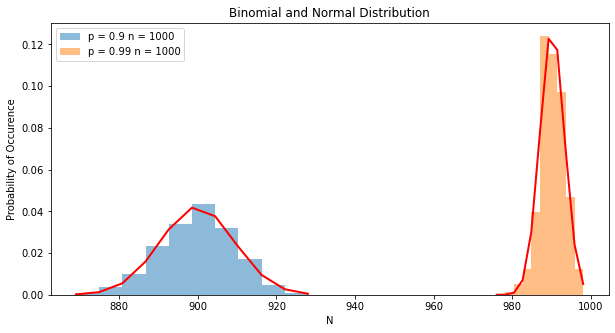

In [10]:
n = 1000
ps = [0.9, 0.99]
trial = 1000

results = []

plt.figure(figsize=(10,5))

x = np.linspace(0, 1, trial)
for p in ps:
    s = np.random.binomial(n, p, trial)
    results.append(s)
    
    lbl_text = 'p = {} n = {}'.format(p,n)
    count, bins, ignored = plt.hist(s, label=lbl_text, alpha = 0.5, density=True, stacked=True)

    mean = np.mean(s)
    sigma = np.std(s)
    
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mean)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.title('Binomial and Normal Distribution')
plt.xlabel('N')
plt.ylabel('Probability of Occurence')
plt.legend()
plt.show()

The normal distribution would be fit into the binomial distribution if the binomial distribution skewness is low. It means that the distribution has to be symatrical. Whenever the binomial distrubution has both negative or positive skewness, the normal distribution is no longer a good representation. As noticed in the figure above, when the probability is getting closer to 1, the normal distribution seems to have large inaccuracy. This may occurs when the distributon is skewed. 

Apart from inability to mimic skewness, the normal distribution is still a good representation of binomial distriution. One particular reason is that analytically the distribution is quite robust. doing operation such as integration and derivation is a lot easier compared to the others. Furthermore one can easily tells the data by looking at the distribution sice the mean and sthe standard deviation can be pictured clearly by the distribution. 

## C

In [11]:
from scipy.special import factorial

def get_poisson(myu, k):   
    return np.exp(-myu)*np.power(myu, k)/factorial(k)

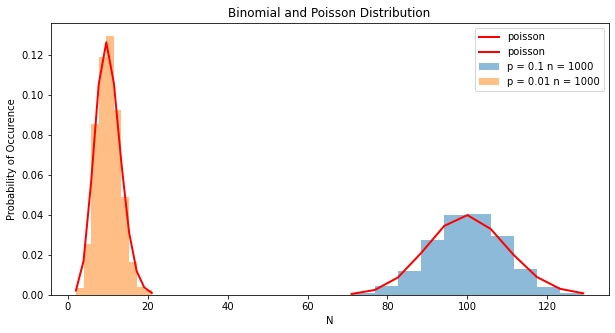

In [12]:
n = 1000
ps = [0.1, 0.01]
trial = 1000

results = []

plt.figure(figsize=(10,5))

x = np.linspace(0, 1, trial)
for p in ps:
    s = np.random.binomial(n, p, trial)
    results.append(s)
    
    lbl_text = 'p = {} n = {}'.format(p,n)
    count, bins, ignored = plt.hist(s, bins = 10,label=lbl_text, alpha = 0.5, density=True, stacked=True)

    mean = np.mean(s)
    
    pois = get_poisson(mean, bins)
    plt.plot(bins, pois, linewidth=2, color='r', label='poisson')
plt.title('Binomial and Poisson Distribution')
plt.xlabel('N')
plt.ylabel('Probability of Occurence')
plt.legend()
plt.show()

In order to model binomial distribution with considerable amount of skewness, poisson distribution may be fit for the purpose. The possion distribution however wont be able to fit symetrical distgribution as good as the normal distribution. 